In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import sklearn as sk
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud



In [2]:
# Load the data

df = pd.read_csv('dataset/text.csv')

In [3]:
# Display the first 5 rows of the data
print(df.head())

   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4


In [4]:
# subsitutting labels for categorical data
# Sadness = 0
# Joy = 1
# Love = 2
# Anger = 3
# Fear = 4
# Surprise = 5

# subsituting label numeric for categorical data
df['label'] = df['label'].replace(0, 'Sadness')
df['label'] = df['label'].replace(1, 'Joy')
df['label'] = df['label'].replace(2, 'Love')
df['label'] = df['label'].replace(3, 'Anger')
df['label'] = df['label'].replace(4, 'Fear')
df['label'] = df['label'].replace(5, 'Surprise')

# Display the first 5 rows of the data
print(df.head())

# info method
df.info()

   Unnamed: 0                                               text    label
0           0      i just feel really helpless and heavy hearted     Fear
1           1  ive enjoyed being able to slouch about relax a...  Sadness
2           2  i gave up my internship with the dmrg and am f...     Fear
3           3                         i dont know i feel so lost  Sadness
4           4  i am a kindergarten teacher and i am thoroughl...     Fear
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.5+ MB


In [5]:
# check null values

print(df.isnull().sum())

Unnamed: 0    0
text          0
label         0
dtype: int64


label
Joy         141067
Sadness     121187
Anger        57317
Fear         47712
Love         34554
Surprise     14972
Name: count, dtype: int64


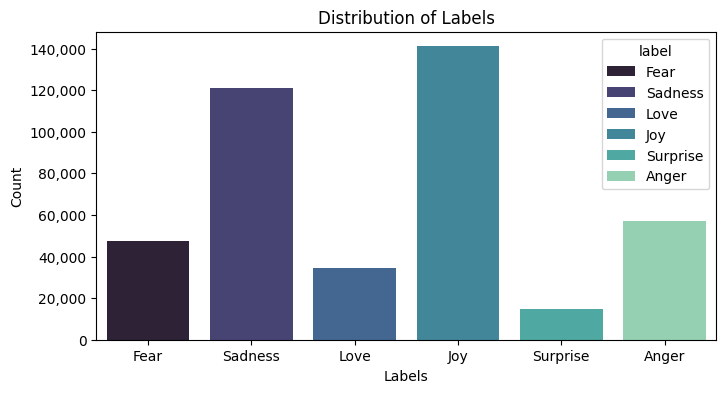

In [6]:
import matplotlib.ticker as ticker


# Printing value counts of the label column
print(df['label'].value_counts())

# Choosing a nicer color palette
colors = sns.color_palette("mako")

# Plotting a histogram of the label column with the chosen color palette
plt.figure(figsize=(8,4))
ax = sns.countplot(x='label', data=df, palette=colors, hue='label', dodge=False)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# formatting the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.show()


In [7]:
# print all unique characters in the text column
unique_chars = set(''.join(list(df['text'])))
print(unique_chars)

# Counting the number of unique characters in the text column
print(f'The number of unique characters in the text column is: {len(unique_chars)}')

{'f', ' ', 'x', 'n', 'b', 'k', 't', 's', 'w', 'v', 'l', 'a', 'o', 'y', 'u', 'z', 'd', 'e', 'q', 'j', 'h', 'g', 'i', 'c', 'm', 'p', 'r'}
The number of unique characters in the text column is: 27


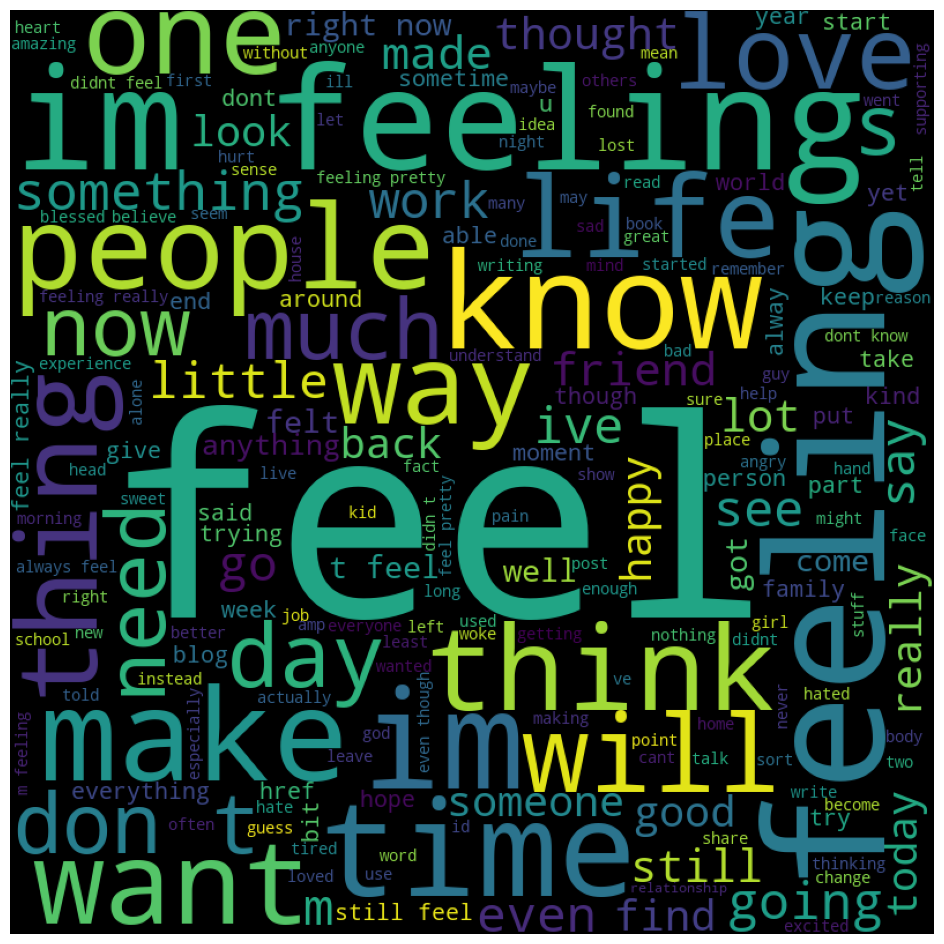

In [8]:
# showing the cloud of words

# Creating a string with all the text in the text column
text = ' '.join(df['text'])

# Creating the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = None,
                min_font_size = 10).generate(text)

# Plot the wordcloud
plt.figure(figsize = (12, 12))

# remove axis
plt.axis("off")
plt.imshow(wordcloud)


In [9]:
# Drop unamed column
df = df.drop('Unnamed: 0', axis=1)

# Display the first 5 rows of the data
print(df.head())

                                                text    label
0      i just feel really helpless and heavy hearted     Fear
1  ive enjoyed being able to slouch about relax a...  Sadness
2  i gave up my internship with the dmrg and am f...     Fear
3                         i dont know i feel so lost  Sadness
4  i am a kindergarten teacher and i am thoroughl...     Fear


In [10]:
# Copy of the original dataframe
df_copy = df.copy()

In [11]:
# split the data into training, validation and  testing sets

# X y Y split

X = df_copy['text']
y = df_copy['label']

# Splitting the data into training and testing sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) # 70% training, 30% testing

# Splitting the temp data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)  # 15% validation, 15% testing 


In [12]:
# display the shape of the training, validation and testing sets

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Testing set shape: {X_test.shape}')

# Display the first 5 rows of the training set
print(X_train.head())

# type of the training set
print(type(X_train))

Training set shape: (291766,)
Validation set shape: (62521,)
Testing set shape: (62522,)
174389    ive grown accustomed to my gun and it feels mu...
244552    i feel inspiration that i should continue to s...
304371    im actually feeling very dull right now or in ...
54754     i feel that giving back to my beloved fans is ...
410931    i have been doing i have no reason to feel fri...
Name: text, dtype: object
<class 'pandas.core.series.Series'>


In [13]:
# add column name label to y_train, y_val and y_test

y_train = pd.DataFrame(y_train, columns=['label'])
y_val = pd.DataFrame(y_val, columns=['label'])
y_test = pd.DataFrame(y_test, columns=['label'])


In [14]:
# print the first 5 rows of the y_train

print(y_train.head())

print(type(y_train))

          label
174389    Anger
244552      Joy
304371  Sadness
54754      Love
410931     Fear
<class 'pandas.core.frame.DataFrame'>


In [15]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding the label column

one_hot_encoder = OneHotEncoder()

# Fit the encoder on the training labels

one_hot_encoder.fit(y_train)

# Transform the training labels, test labels, and validation labels

y_train = one_hot_encoder.transform(y_train).toarray()
y_val = one_hot_encoder.transform(y_val).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()


In [23]:
# save the one hot encoder

import joblib

# Save the encoder

joblib.dump(one_hot_encoder, 'ohe_basemodel.joblib')

['ohe_basemodel.joblib']

In [16]:
# check the shape of the one hot encoded labels and head

print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Testing labels shape: {y_test.shape}')
print(f'Training labels head: {y_train[:5]}')


Training labels shape: (291766, 6)
Validation labels shape: (62521, 6)
Testing labels shape: (62522, 6)
Training labels head: [[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [17]:
# print the type of X_train, X_val and X_test
print(type(X_train))
print(type(X_val))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [18]:
# Convert pandas series to numpy arrays

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)



In [19]:
# check X_train, X_val and X_test type

print(type(X_train))

<class 'numpy.ndarray'>


In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Normalize the text data

# Strip white spaces function

def strip_whitespace(text):
    return text.strip()

# lower case function

def lower_case(text):
    return text.lower()

# remove punctuation function

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Tokenization function

def tokenize(text):
    return word_tokenize(text)

# Remove stopwords function

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [item for item in tokens if item not in stop_words]

# stemming function

def stem_text(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# join words into a single string

def join_text(tokens):
    return ' '.join(tokens)


# join functions into a single function

def normalize_text(text):
    text = strip_whitespace(text)
    text = lower_case(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = stem_text(text)
    text = join_text(text)
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gpg90\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gpg90\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gpg90\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
# Normalize X_train, X_val, and X_test

X_train_norm = [normalize_text(text) for text in X_train]
X_val_norm = [normalize_text(text) for text in X_val]
X_test_norm = [normalize_text(text) for text in X_test]

In [25]:
# check the first 5 rows of the normalized text

print(X_train_norm[:5])
print(type(X_train_norm))

['ive grown accustom gun feel much less violent control gun', 'feel inspir continu spend valuabl time contempl challeng matter', 'im actual feel dull right word bore', 'feel give back belov fan within best interest', 'reason feel frighten']
<class 'list'>


In [26]:
# vectorize X_train, X_val, and X_test

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer

vectorizer = TfidfVectorizer(max_features=2000)

# fit the vectorizer on the training data

vectorizer.fit(X_train_norm)

# Transform the training data, validation data, and test data

X_train_vec = vectorizer.transform(X_train_norm)
X_val_vec = vectorizer.transform(X_val_norm)
X_test_vec = vectorizer.transform(X_test_norm)


In [30]:
import pickle


# Save the vectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Moodel architecture
model = Sequential()

# Layer 1
model.add(Dense(128, input_shape=(2000,), activation='relu'))


# Layer 2
model.add(Dense(264, activation='relu'))

# Add a dropout layer

model.add(Dropout(0.5))

# Layer 3
model.add(Dense(128, activation='relu'))

# add a dropout layer

model.add(Dropout(0.5))

# Layer 4
model.add(Dense(64, activation='relu'))
# Layer 5
model.add(Dense(32, activation='relu'))


# Output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               256128    
                                                                 
 dense_1 (Dense)             (None, 264)               34056     
                                                                 
 dropout (Dropout)           (None, 264)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               33920     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)              

In [31]:
# Convert the data to numpy arrays

X_train_vec = X_train_vec.toarray()
X_val_vec = X_val_vec.toarray()
X_test_vec = X_test_vec.toarray()

In [32]:
# Model training
history = model.fit(X_train_vec, y_train,
                    validation_data=(X_val_vec, y_val),
                    epochs=10, 
                    batch_size=32)


Epoch 1/10


9118/9118 [==============================] - 34s 4ms/step - loss: 1.4849 - accuracy: 0.4033 - val_loss: 0.9138 - val_accuracy: 0.6555
Epoch 2/10
9118/9118 [==============================] - 28s 3ms/step - loss: 0.6718 - accuracy: 0.7563 - val_loss: 0.5405 - val_accuracy: 0.8156
Epoch 3/10
9118/9118 [==============================] - 28s 3ms/step - loss: 0.5009 - accuracy: 0.8252 - val_loss: 0.4405 - val_accuracy: 0.8422
Epoch 4/10
9118/9118 [==============================] - 28s 3ms/step - loss: 0.4439 - accuracy: 0.8452 - val_loss: 0.3926 - val_accuracy: 0.8584
Epoch 5/10
9118/9118 [==============================] - 28s 3ms/step - loss: 0.4002 - accuracy: 0.8582 - val_loss: 0.3648 - val_accuracy: 0.8669
Epoch 6/10
9118/9118 [==============================] - 29s 3ms/step - loss: 0.3679 - accuracy: 0.8660 - val_loss: 0.3370 - val_accuracy: 0.8704
Epoch 7/10
9118/9118 [==============================] - 28s 3ms/step - loss: 0.3426 - accuracy: 0.8710 - val_loss: 0.3097 - val_

In [33]:
# Save the model

model.save('base_model.h5')

c:\Users\gpg90\Documents\carrera_de_datos\portafolio\Categorizers\sentiment_tweets\tenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


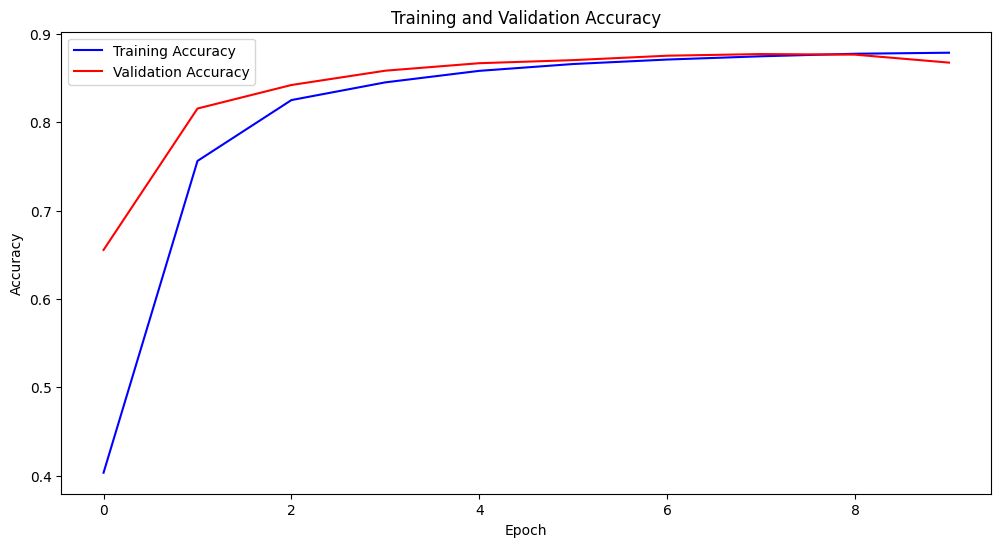

In [34]:
# # plot the training and validation accuracy

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# evaluate the model

# load the model file

from keras.models import load_model

model_one = load_model('base_model.h5')

# Evaluate the model on the test data

loss, accuracy = model_one.evaluate(X_test_vec, y_test)

# Print the loss and accuracy

print(f'Test Loss: {loss}')

print(f'Test Accuracy: {accuracy}')

# Predict on the test data

y_pred = model_one.predict(X_test_vec)

1954/1954 [==============================] - 4s 2ms/step - loss: 0.3232 - accuracy: 0.8683
Test Loss: 0.3232489228248596
Test Accuracy: 0.8683343529701233
1954/1954 [==============================] - 4s 2ms/step


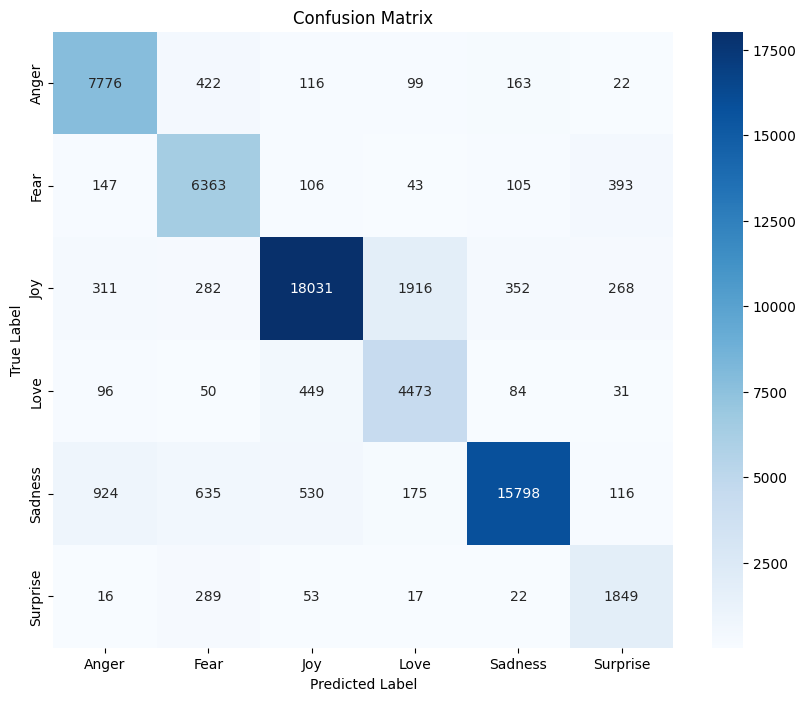

In [36]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted class

y_pred_class = np.argmax(y_pred, axis=1)

# Get the true class

y_true_class = np.argmax(y_test, axis=1)


# Create the confusion matrix

conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Plot the confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=one_hot_encoder.categories_[0], yticklabels=one_hot_encoder.categories_[0])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()